# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [6]:
from collections import Counter
import numpy as np

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [8]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [9]:
positive_counts.most_common()[:15]

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815)]

In [10]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [11]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()[:15]

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353)]

In [12]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

# Transforming Text into Numbers

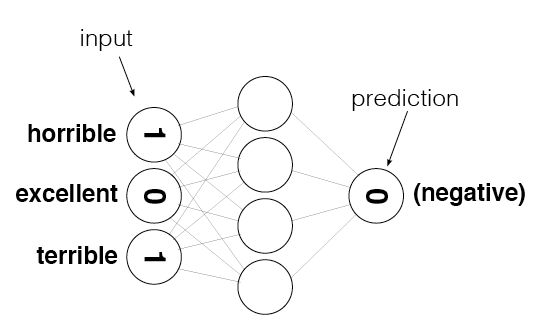

In [13]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

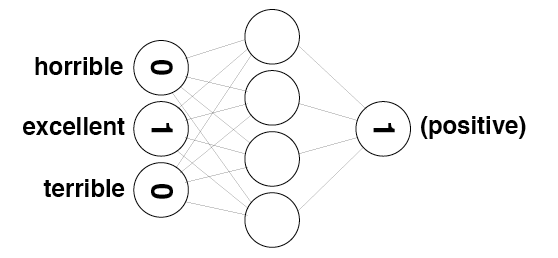

In [14]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [15]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [16]:
list(vocab)[:15]

['',
 'procrastinating',
 'xxxxviii',
 'crowning',
 'sierra',
 'pharisees',
 'creds',
 'trimmer',
 'elsa',
 'haddonfield',
 'sullivanis',
 'involve',
 'blucher',
 'fags',
 'giada']

In [17]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

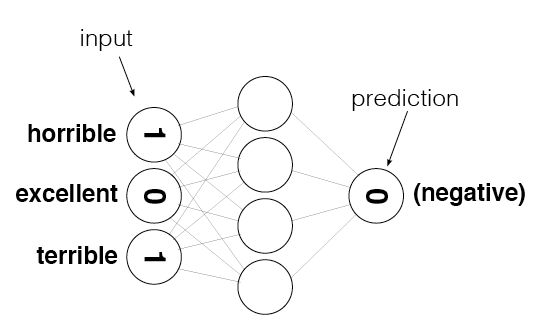

In [18]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [19]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
    
word2index_sample = {k: word2index[k] for k in list(word2index.keys())[:15]}

word2index_sample

{'': 0,
 'blucher': 12,
 'creds': 6,
 'crowning': 3,
 'elsa': 8,
 'fags': 13,
 'giada': 14,
 'haddonfield': 9,
 'involve': 11,
 'pharisees': 5,
 'procrastinating': 1,
 'sierra': 4,
 'sullivanis': 10,
 'trimmer': 7,
 'xxxxviii': 2}

In [20]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [21]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [22]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [23]:
labels[0]

'POSITIVE'

In [24]:
get_target_for_label(labels[0])

1

In [25]:
labels[1]

'NEGATIVE'

In [26]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

### Where to Get Help if You Need it
- Re-watch previous week's Udacity Lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (40% Off: **traskud17**)

In [27]:
import time
import sys
import numpy as np


class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes=10, learning_rate=0.1):
        
        # Set our random number generator
        np.random.seed(1)
        
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab), hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
            
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
    
    
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5,
                                           (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1, input_nodes))
    
    
    def update_input_layer(self, review):
        
        # Clear out previous state, reset the layer to be all zeros
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
    
    
    def get_target_for_label(self, label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
    
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self, output):
        return output * (1 - output)
    
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###
            
            # Input layer
            self.update_input_layer(review)
            
            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)
            
            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###
            
            # Output error
            # Output layer error is the difference between the desired target and the actual output.
            layer_2_error = layer_2 - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)
            
            # Backpropagated error
            # Errors propagated to the hidden layer
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)
            layer_1_delta = layer_1_error # hidden layer gradients- no nonlinearity so it's same as the error
            
            # Update the weights
            # Update hidden-to-output weights with gradient descent step
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate
            # Update input-to-hidden weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate
            
            if (np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i / float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " Correct:" + str(correct_so_far) + " #Trained:" + str(i + 1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i + 1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
        
        
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if (pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
            
    
    def run(self, review):
        
        # Input layer
        self.update_input_layer(review.lower())
        
        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)
        
        # Output laer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if (layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [39]:
mlp = SentimentNetwork(reviews[:-1000], labels[:-1000], learning_rate=0.1)

In [40]:
# Evaluate our model before training
mlp.test(reviews[-1000:], labels[-1000:])

Progress:99.9% Speed(reviews/sec):887.0% #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [41]:
mlp.train(reviews[:-1000], labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):131.6 Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):132.1 Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):132.8 Correct:3750 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):133.1 Correct:5000 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):132.5 Correct:6250 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):132.1 Correct:7500 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):131.4 Correct:8750 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):131.0 Correct:10000 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):130.6 Correct:11250 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):130.5 Correct:11999 #Trained:24000 Training Accuracy:49.9%

In [44]:
mlp = SentimentNetwork(reviews[:-1000], labels[:-1000], learning_rate=0.001)

In [45]:
mlp.train(reviews[:-1000], labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):132.0 Correct:1252 #Trained:2501 Training Accuracy:50.0%
Progress:20.8% Speed(reviews/sec):131.9 Correct:2608 #Trained:5001 Training Accuracy:52.1%
Progress:31.2% Speed(reviews/sec):132.0 Correct:4029 #Trained:7501 Training Accuracy:53.7%
Progress:41.6% Speed(reviews/sec):129.3 Correct:5586 #Trained:10001 Training Accuracy:55.8%
Progress:52.0% Speed(reviews/sec):127.1 Correct:7164 #Trained:12501 Training Accuracy:57.3%
Progress:62.5% Speed(reviews/sec):126.8 Correct:8756 #Trained:15001 Training Accuracy:58.3%
Progress:72.9% Speed(reviews/sec):127.2 Correct:10392 #Trained:17501 Training Accuracy:59.3%
Progress:83.3% Speed(reviews/sec):127.4 Correct:12064 #Trained:20001 Training Accuracy:60.3%
Progress:93.7% Speed(reviews/sec):127.1 Correct:13769 #Trained:22501 Training Accuracy:61.1%
Progress:99.9% Speed(reviews/sec):127.0 Correct:14827 #Trained:24000 Training Accuracy:61.7